In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_excel("studentTandF16.xlsx", sheet_name = "NewSheet", dtype={'distance': object, 'zips': str})

In [3]:
#df.drop(['Unnamed: 0'], axis = 1, inplace = True) 

In [4]:
df.head(3)

,Unnamed: 0,distance,zips
0,0,1573,00902
1,1,1573,00921
2,2,1573,00966


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 3 columns):
Unnamed: 0    1309 non-null int64
distance      1309 non-null object
zips          1309 non-null object
dtypes: int64(1), object(2)
memory usage: 30.8+ KB


In [6]:
print(df[df['distance'] == 'China'])
print(df[df['distance'] == 'Spain'])
print(df[df['distance'] == 'France']) 

      Unnamed: 0 distance    zips
202          774    China  110000
662          775    China  210029
1172         776    China  230041
     Unnamed: 0 distance   zips
354         222    Spain  19198
    Unnamed: 0 distance   zips
88          55   France  07290


### 5 out of 1309 dropped for air travel

In [7]:
df.drop([55, 222, 776, 775, 774], inplace = True)
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1308
Data columns (total 3 columns):
Unnamed: 0    1304 non-null int64
distance      1304 non-null object
zips          1304 non-null object
dtypes: int64(1), object(2)
memory usage: 40.8+ KB


### Creating a buffer of 300 miles

In [8]:
df['car'] = df[df['distance'] <= 300]['distance']
df['airTravel'] = df[df['distance'] > 300]['distance']

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
df.head(3)

In [ ]:
df.info()

In [ ]:
print("Number of Students outside 300 miles buffer (International):", 1309-1146)
print("Number of students intside 300 miles buffer (domestic):",1309-158) 

## Droping 158 columns from buffer

In [ ]:
plt.figure(figsize=(10,7))  
sns.heatmap(df.isnull(), cmap = 'magma') 

### Calculate air travel/miles

In [ ]:
df['airTravel'].sum()

In [ ]:
# Passenger miles/trip
totalMiles = df['airTravel'].sum()
passengerMiles = totalMiles/163
print("For students who use air travel, average passenger/miles for each student = ", passengerMiles)

In [ ]:
df['totalAirTravel'] = df['airTravel']*4

In [ ]:
df['totalAirTravel'].sum()

In [ ]:
df.drop(['airTravel', 'totalAirTravel'], axis = 1, inplace = True) 

In [ ]:
plt.figure(figsize=(10,7))  
sns.heatmap(df.isnull(), cmap = 'plasma') 

* Dropping null values

In [ ]:
df.dropna(inplace=True)

In [ ]:
plt.figure(figsize=(10,7))  
sns.heatmap(df.isnull(), cmap = 'viridis') 

* 163 students use air travel (including international students and students who live >300 miles from campus)

In [ ]:
# Air travel 
(163/1309)*100 

* 12.45% use air travel, the other 87.55% commute using car.
* Travel once yearly to come to Washington College, once yearly to go back home.
* To and fro during Thanksgiving break.
* To and fro during Fall break (33% stayed on campus)
* To and fro during winter break.
* To and fro during spring break.
* It is to be noted that students are not required to leave campus during Thanksgiving, Spring and Fall break. Hence, to calculate student to and fro we only consider winter break and the beginning and end of college year.

In [ ]:
df.head()

In [ ]:
df.drop(['distance'], inplace = True, axis = 1) 

In [ ]:
df.info()

In [ ]:
df['totalDistance'] = df['car']*4 

In [ ]:
df.tail(3)

In [ ]:
totalDistCar = df['totalDistance'].sum()
print("Total distance covered by students <= 300 miles from WAC throughout the academic year is", totalDistCar) 

In [ ]:
print("Passenger/miles for students who commute via car is",(431548.79999999976/4)/1146) 

In [29]:
from sklearn.linear_model import LinearRegression



df5 = pd.DataFrame(np.array([[2108000, '2016'], [3001835, '2017'], [3043853, '2018'], [26710.2,'2019'], [None,'2020']]), 
                   columns=['miles', 'year'])

In [30]:
df5.head()

,miles,year
0,2108000,2016
1,3001835,2017
2,3043853,2018
3,2563080,2019
4,None,2020


In [31]:
X = df5['year'].values.reshape(-1,1)
y = df5['miles'].values.reshape(-1,1)
lr =  LinearRegression()
lr.fit(X[:4],y[:4])
Y_pred = lr.predict(X[:5]) 

In [32]:
print(X[4:5])
print(y)
print(Y_pred)

[['2020']]
[[2108000]
 [3001835]
 [3043853]
 [2563080]
 [None]]
[[2468103.29999995]
 [2608829.09999996]
 [2749554.89999998]
 [2890280.69999999]
 [3031006.5       ]]


[2468103.29999995 2608829.09999996 2749554.89999998 2890280.69999999
 3031006.5       ]


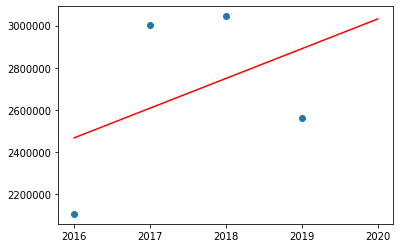

In [33]:
plt.scatter(X.flatten(), y.flatten())
print(Y_pred.flatten()) 
plt.plot(X.flatten(), Y_pred.flatten(), color='red')
plt.show() 